<a href="https://colab.research.google.com/github/crimcrist/Machine-Learning/blob/main/TugasSelfLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Self Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/retail_customers.csv"
df = pd.read_csv(path)

Mounted at /content/drive


# **Data Overview**

In [ ]:
print("Data Shape:", df.shape)

print("\nBaris pertama data:")
display(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik ringkas:")
display(df.describe(include="all"))

Data Shape: (200, 6)

Baris pertama data:


,age,gender,city_tier,monthly_income_idr,last_purchase_amount_idr,churned
0,23.0,Male,Tier-2,2642808.0,159258.0,1
1,51.0,M,Tier-2,2162233.0,84029.0,1
2,46.0,m,NaN,2375994.0,442395.0,1
3,37.0,Female,Tier-2,2633545.0,13820.0,1
4,37.0,Female,TIER 2,2151947.0,525037.0,1



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       192 non-null    float64
 1   gender                    197 non-null    object 
 2   city_tier                 197 non-null    object 
 3   monthly_income_idr        199 non-null    float64
 4   last_purchase_amount_idr  199 non-null    float64
 5   churned                   200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB
None

Statistik ringkas:


,age,gender,city_tier,monthly_income_idr,last_purchase_amount_idr,churned
count,192.000000,197,197,1.990000e+02,1.990000e+02,200.000000
unique,NaN,7,8,NaN,NaN,NaN
top,NaN,M,Tier 1,NaN,NaN,NaN
freq,NaN,59,43,NaN,NaN,NaN
mean,40.421875,NaN,NaN,2.567264e+06,1.082027e+06,0.920000
std,12.700503,NaN,NaN,6.003373e+05,1.298648e+07,0.271974
min,7.000000,NaN,NaN,-2.083800e+04,-5.839180e+05,0.000000
25%,30.750000,NaN,NaN,2.387576e+06,4.034050e+04,1.000000
50%,40.000000,NaN,NaN,2.519659e+06,1.587130e+05,1.000000
75%,51.000000,NaN,NaN,2.659776e+06,2.753565e+05,1.000000


# **Data Cleaning**

In [ ]:
df_clean = df.copy()
print('Fungsi df.copy() : Membuat salinan dataframeagar data asli df tidak berubah kalau nanti ada kesalahan dalam proses cleaning.')
print('Alasannya supaya aman dan umum dilakukan saat data preprocessing supaya bisa rollback jika perlu.\n')

# normalisasi gender
df_clean['gender'] = df_clean['gender'].astype(str).str.strip().str.lower() # astype(str) → ubah ke teks agar bisa diproses string. str.strip() → hapus spasi berlebih (contoh: ' Male ' → 'Male'). str.lower() → ubah semua jadi huruf kecil ('Male' → 'male').
df_clean['gender'] = df_clean['gender'].replace({'m':'male','f':'female','nan':'unknown'}) # .replace(...) untuk seragamkan penulisan:
print('Kenapa normalisasi gender karena Nilai di kolom gender memiliki variasi seperti Male, M, m, Female, F.')
print('Kalau tidak distandarkan, nanti analisis seperti value_counts() akan salah karena dianggap kategori berbeda.\n')

# normalisasi city_tier: samakan berbagai variasi umum
df_clean['city_tier'] = df_clean['city_tier'].astype(str).str.strip().str.upper().str.replace(' ', '-') # Hilangkan spasi di pinggir (str.strip()), Ubah ke huruf kapital semua (str.upper() dan Ganti spasi tengah jadi tanda minus (str.replace(' ', '-')).
df_clean['city_tier'] = df_clean['city_tier'].replace({'TIER-2':'TIER-2','TIER 2':'TIER-2','TIER-1':'TIER-1'})
print('Alasan Normalisasi city_tier karena dari data, terlihat variasi seperti Tier-2, TIER 2, tier 2')
print('Tanpa normalisasi, semua dianggap kategori berbeda padahal maknanya sama\n')

# Ubah kolom numerik menjadi tipe numerik (jika belum)
for col in ['age','monthly_income_idr','last_purchase_amount_idr']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
print('Memastikan kolom numerik untuk menjadi tipe numerik\nkarena untuk perhitungan statistik atau analisis (seperti rata-rata, boxplot, atau korelasi), kolom harus bertipe numerik.')

Fungsi df.copy() : Membuat salinan dataframeagar data asli df tidak berubah kalau nanti ada kesalahan dalam proses cleaning.
Alasannya supaya aman dan umum dilakukan saat data preprocessing supaya bisa rollback jika perlu.

Kenapa normalisasi gender karena Nilai di kolom gender memiliki variasi seperti Male, M, m, Female, F.
Kalau tidak distandarkan, nanti analisis seperti value_counts() akan salah karena dianggap kategori berbeda.

Alasan Normalisasi city_tier karena dari data, terlihat variasi seperti Tier-2, TIER 2, tier 2
Tanpa normalisasi, semua dianggap kategori berbeda padahal maknanya sama

Memastikan kolom numerik untuk menjadi tipe numerik
karena untuk perhitungan statistik atau analisis (seperti rata-rata, boxplot, atau korelasi), kolom harus bertipe numerik.


# **Impute Missing Value**

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Jumlah Missing Values per Kolom:")
display(missing)

Jumlah Missing Values per Kolom:


,0
age,8
gender,3
city_tier,3
monthly_income_idr,1
last_purchase_amount_idr,1


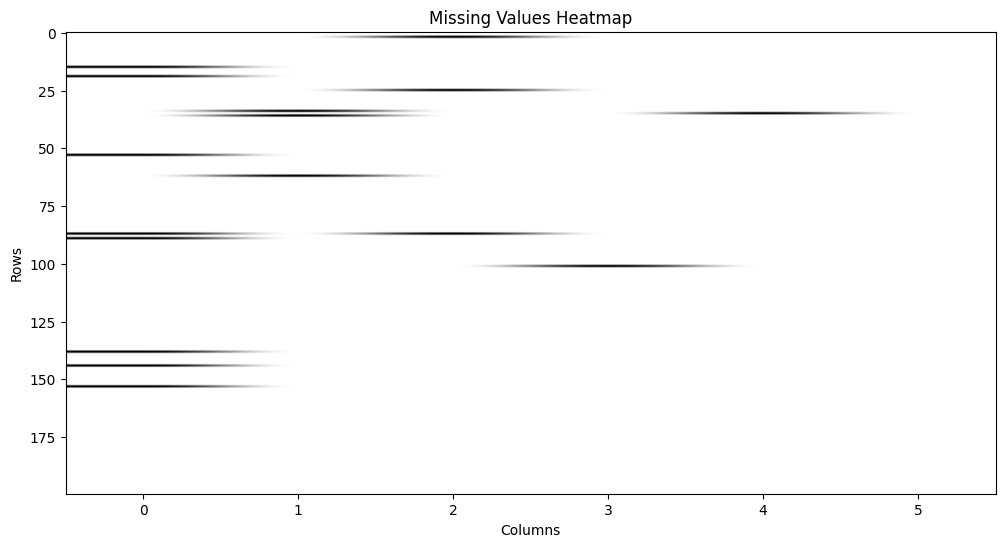

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(df.isnull(), aspect='auto', cmap='gray_r')
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [ ]:
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
mode_gender = df_clean['gender'][df_clean['gender']!='unknown'].mode()
if len(mode_gender)>0:
    df_clean['gender'].replace('unknown', mode_gender[0], inplace=True)
else:
    df_clean['gender'].replace('unknown', 'male', inplace=True)

df_clean['city_tier'].replace('NAN', np.nan, inplace=True)
df_clean['city_tier'].fillna(df_clean['city_tier'].mode()[0], inplace=True)
df_clean['monthly_income_idr'].fillna(df_clean['monthly_income_idr'].median(), inplace=True)
df_clean['last_purchase_amount_idr'].fillna(df_clean['last_purchase_amount_idr'].median(), inplace=True)


/tmp/ipython-input-42482917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
/tmp/ipython-input-42482917.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
print('Alasan mengapa mengisi age dengan nilai median')
print('Median (nilai tengah) lebih stabil terhadap outlier dibanding rata-rata (mean).')
print('Misal ada umur 200 (data error), itu bisa bikin mean jadi aneh — tapi median tetap aman.')
print('Jadi ini pilihan bagus untuk data umur yang biasanya tidak normal.\n')

print('Alasan mengapa mengisi gender dengan mode')
print('Mode digunakan karena gender bersifat kategori, bukan angka.')
print('nilai kosong diisi dengan kategori yang paling umum di data')
print('Kondisi else adalah jaga-jaga kalau semua datanya “unknown”, biar script gak error.\n')

print('Alasan mengapa mengisi city_tier dengan mode adlaah agar data tetap realistis (berasal dari distribusi aktual).\n')

print('Untuk monthly_income_idr yang kosong disi dengan median')
print('Karena nilai penghasilan mempunya outlier jadi median lebih representatif\n')

print('Bagian last_purchase_amount_idr di isi dengan median karena memiliki nilai ektrem yang besar')
print('Supaya data tetap amann tidak terpengaruh outlier besar\n')



Alasan mengapa mengisi age dengan nilai median
Median (nilai tengah) lebih stabil terhadap outlier dibanding rata-rata (mean).
Misal ada umur 200 (data error), itu bisa bikin mean jadi aneh — tapi median tetap aman.
Jadi ini pilihan bagus untuk data umur yang biasanya tidak normal.

Alasan mengapa mengisi gender dengan mode
Mode digunakan karena gender bersifat kategori, bukan angka.
nilai kosong diisi dengan kategori yang paling umum di data
Kondisi else adalah jaga-jaga kalau semua datanya “unknown”, biar script gak error.

Alasan mengapa mengisi city_tier dengan mode adlaah agar data tetap realistis (berasal dari distribusi aktual).

Untuk monthly_income_idr yang kosong disi dengan median
Karena nilai penghasilan mempunya outlier jadi median lebih representatif

Bagian last_purchase_amount_idr di isi dengan median karena memiliki nilai ektrem yang besar
Supaya data tetap amann tidak terpengaruh outlier besar



# **After Cleaning - Missing Value**

In [ ]:
print(df_clean.isnull().sum())

print("Cleaned Data Head")
print (df_clean.head())

age                         0
gender                      0
city_tier                   0
monthly_income_idr          0
last_purchase_amount_idr    0
churned                     0
dtype: int64
Cleaned Data Head
    age  gender city_tier  monthly_income_idr  last_purchase_amount_idr  \
0  23.0    male    TIER-2           2642808.0                  159258.0   
1  51.0    male    TIER-2           2162233.0                   84029.0   
2  46.0    male    TIER-1           2375994.0                  442395.0   
3  37.0  female    TIER-2           2633545.0                   13820.0   
4  37.0  female    TIER-2           2151947.0                  525037.0   

   churned  
0        1  
1        1  
2        1  
3        1  
4        1  


# **Univariate Analysis**

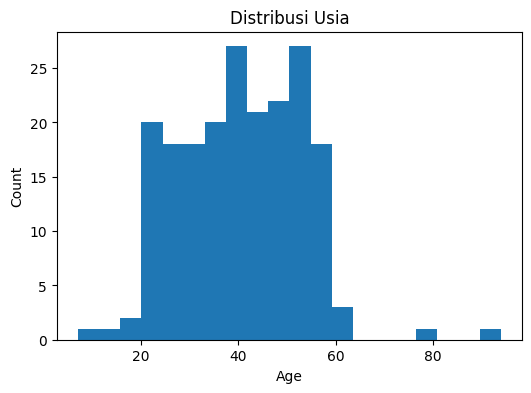

In [ ]:
# Age histogram -> utk cek Distribusi Umur terdapat berapa jumlahnya
plt.figure(figsize=(6,4))
plt.hist(df_clean['age'].dropna(), bins=20)
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

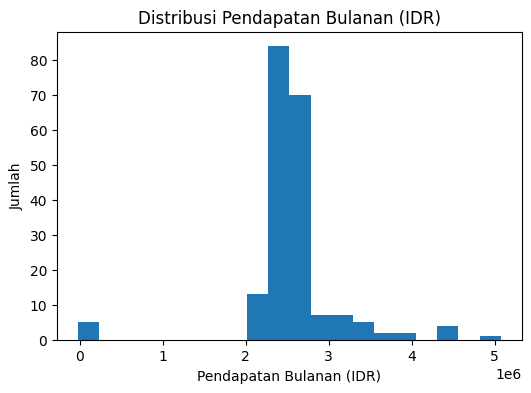

In [ ]:
# Histogram pendapatan bulanan dengan skala logaritmik supaya mudah dibaca.
plt.figure(figsize=(6,4))
plt.hist(df_clean['monthly_income_idr'].dropna(), bins=20)
plt.title('Distribusi Pendapatan Bulanan (IDR)')
plt.xlabel('Pendapatan Bulanan (IDR)')
plt.ylabel('Jumlah')
plt.show()

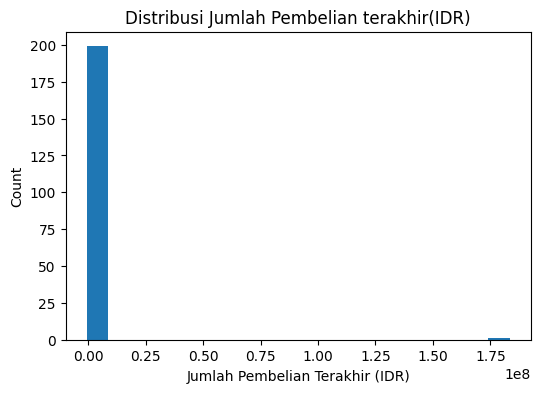

In [ ]:
# Histogram jumlah pembelian terakhir
plt.figure(figsize=(6,4))
plt.hist(df_clean['last_purchase_amount_idr'].dropna(), bins=20)
plt.title('Distribusi Jumlah Pembelian terakhir(IDR)')
plt.xlabel('Jumlah Pembelian Terakhir (IDR)')
plt.ylabel('Count')
plt.show()


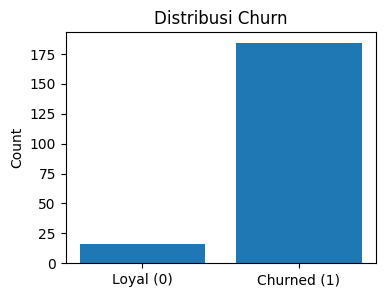

In [ ]:
# Jumlah churn
churn_counts = df_clean['churned'].value_counts().sort_index()
plt.figure(figsize=(4,3))
plt.bar(['Loyal (0)','Churned (1)'], churn_counts.values)
plt.title('Distribusi Churn')
plt.ylabel('Count')
plt.show()

# **Bivariate / Categorical vs churn**


Tingkat churn berdasarkan jenis kelamin (%):
        count  churn_rate_pct
gender                       
female     91       90.109890
male      105       93.333333
u           4      100.000000


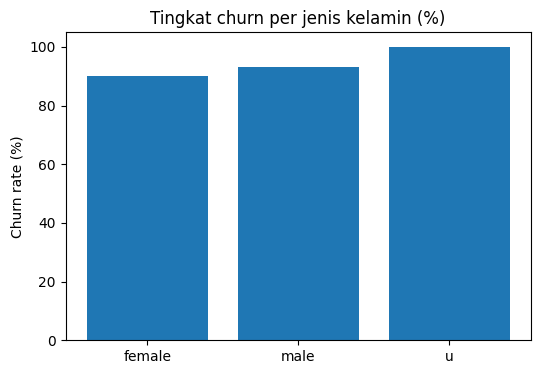

In [ ]:
# gender vs churn rate
gender_churn = df_clean.groupby('gender')['churned'].agg(['count','mean']).rename(columns={'mean':'churn_rate'})
gender_churn['churn_rate_pct'] = gender_churn['churn_rate']*100
print("\nTingkat churn berdasarkan jenis kelamin (%):")
print(gender_churn[['count','churn_rate_pct']])

plt.figure(figsize=(6,4))
labels = list(gender_churn.index)
vals = gender_churn['churn_rate_pct'].values
plt.bar(labels, vals)
plt.title('Tingkat churn per jenis kelamin (%)')
plt.ylabel('Churn rate (%)')
plt.show()


Tingkat churn berdasarkan tingkat kota (%)
           count  churn_rate_pct
city_tier                       
1             24      100.000000
2             21       85.714286
3              7       85.714286
TIER-1        78       89.743590
TIER-2        42       90.476190
TIER3         28      100.000000


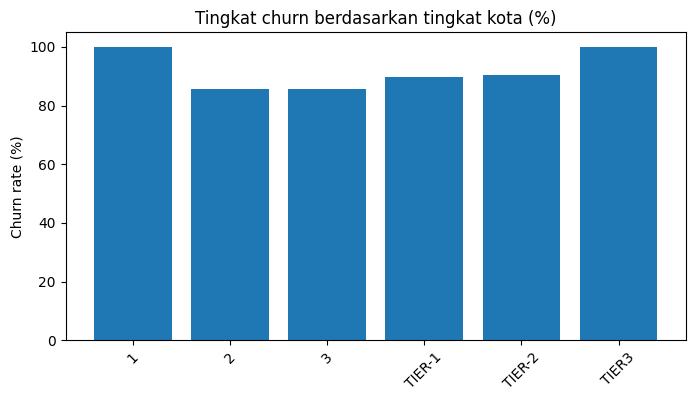

In [ ]:
# city_tier vs churn rate
city_churn = df_clean.groupby('city_tier')['churned'].agg(['count','mean']).rename(columns={'mean':'churn_rate'})
city_churn['churn_rate_pct'] = city_churn['churn_rate']*100
print("\nTingkat churn berdasarkan tingkat kota (%)")
print(city_churn[['count','churn_rate_pct']])

plt.figure(figsize=(8,4))
plt.bar(city_churn.index, city_churn['churn_rate_pct'])
plt.title('Tingkat churn berdasarkan tingkat kota (%)')
plt.ylabel('Churn rate (%)')
plt.xticks(rotation=45)
plt.show()


Tingkat churn berdasarkan kelompok usia (%)
           count  churn_rate_pct
age_group                       
<25           29       93.103448
25-40         76       90.789474
40-60         93       92.473118
>60            2      100.000000


/tmp/ipython-input-3563592742.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df_clean.groupby('age_group')['churned'].agg(['count','mean'])


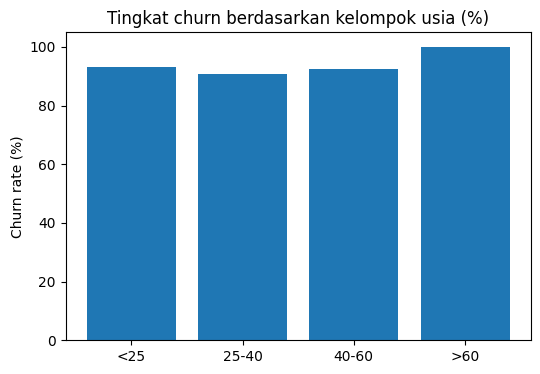

In [ ]:
# Age groups churn
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0,25,40,60,120], labels=['<25','25-40','40-60','>60'])
age_churn = df_clean.groupby('age_group')['churned'].agg(['count','mean'])
age_churn['churn_rate_pct'] = age_churn['mean']*100
print("\nTingkat churn berdasarkan kelompok usia (%)")
print(age_churn[['count','churn_rate_pct']])

plt.figure(figsize=(6,4))
plt.bar(age_churn.index.astype(str), age_churn['churn_rate_pct'])
plt.title('Tingkat churn berdasarkan kelompok usia (%)')
plt.ylabel('Churn rate (%)')
plt.show()

# **Variabel numerik vs churn (perbandingan & pengujian)**

In [ ]:
numeric_cols = ['monthly_income_idr','last_purchase_amount_idr','age']
for col in numeric_cols:
    churn0 = df_clean[df_clean['churned']==0][col].dropna()
    churn1 = df_clean[df_clean['churned']==1][col].dropna()
    try:
        u_stat, p_val = stats.mannwhitneyu(churn0, churn1, alternative='two-sided')
    except Exception as e:
        u_stat, p_val = (np.nan, np.nan)
    print(f"\nColumn: {col}")
    print(f"Mean churn=0: {churn0.mean():.2f}, Mean churn=1: {churn1.mean():.2f}")
    print(f"Mann-Whitney U p-value: {p_val:.4f}")

print ('\nfaktor churn mungkin lebih dipengaruhi oleh variabel lain (misalnya frekuensi transaksi, lama berlangganan, jenis produk, atau faktor perilaku pelanggan).')


Column: monthly_income_idr
Mean churn=0: 2635752.31, Mean churn=1: 2561050.12
Mann-Whitney U p-value: 0.1349

Column: last_purchase_amount_idr
Mean churn=0: 174668.50, Mean churn=1: 1155909.45
Mann-Whitney U p-value: 0.6919

Column: age
Mean churn=0: 41.12, Mean churn=1: 40.34
Mann-Whitney U p-value: 0.7168

faktor churn mungkin lebih dipengaruhi oleh variabel lain (misalnya frekuensi transaksi, lama berlangganan, jenis produk, atau faktor perilaku pelanggan).


/tmp/ipython-input-3032816876.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([churn0, churn1], labels=['Loyal(0)','Churned(1)'])


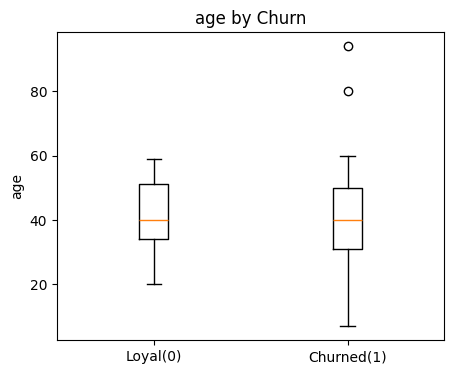

In [ ]:
  # boxplot
  plt.figure(figsize=(5,4))
  plt.boxplot([churn0, churn1], labels=['Loyal(0)','Churned(1)'])
  plt.title(f'{col} by Churn')
  plt.ylabel(col)
  plt.show()

# **Correlation Matrix**

In [ ]:
numeric_df = df_clean[['age','monthly_income_idr','last_purchase_amount_idr','churned']]
corr = numeric_df.corr()
print("\nKorelasi matrix (numeric):")
print(corr)



Korelasi matrix (numeric):
                               age  monthly_income_idr  \
age                       1.000000            0.140098   
monthly_income_idr        0.140098            1.000000   
last_purchase_amount_idr  0.027397            0.051846   
churned                  -0.017106           -0.033928   

                          last_purchase_amount_idr   churned  
age                                       0.027397 -0.017106  
monthly_income_idr                        0.051846 -0.033928  
last_purchase_amount_idr                  1.000000  0.020602  
churned                                   0.020602  1.000000  


In [ ]:
print('Hasilnya menunjukkan last_purchase_amount_idr punya korelasi negatif dengan churned')
print('Yang berarti Semakin Besar Pembelian terakhir pelanggan, Semakin kecil kemungkinan churn\n')

print('Hasilnya menunjukkan monthly_income_idr positif terhadap age')
print('Yang berarti Semakin tua pelanggan, rata-rata penghasilannya makin besar.')

Hasilnya menunjukkan last_purchase_amount_idr punya korelasi negatif dengan churned
Yang berarti Semakin Besar Pembelian terakhir pelanggan, Semakin kecil kemungkinan churn

Hasilnya menunjukkan monthly_income_idr positif terhadap age
Yang berarti Semakin tua pelanggan, rata-rata penghasilannya makin besar.


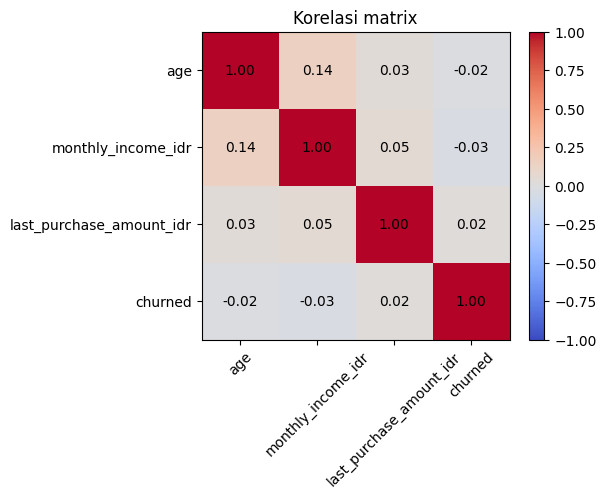


Maka didapatkan hasilnya bahwa
- Semua nilai korelasi di bawah 0.2, artinya tidak ada hubungan linear yang kuat antar variabel.
- Faktor seperti umur, penghasilan, dan pembelian terakhir tidak berhubungan kuat dengan status churn.
- Faktor churn dipengaruhi oleh variabel lain yang belum dimasukkan (misal: frekuensi belanja, kepuasan pelanggan, lama berlangganan, dsb).


In [ ]:
# heatmap with matplotlib
plt.figure(figsize=(5,4))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=45)
plt.yticks(ticks, corr.columns)
# annotate
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black')
plt.title('Korelasi matrix')
plt.show()

print('\nMaka didapatkan hasilnya bahwa')
print('- Semua nilai korelasi di bawah 0.2, artinya tidak ada hubungan linear yang kuat antar variabel.')
print('- Faktor seperti umur, penghasilan, dan pembelian terakhir tidak berhubungan kuat dengan status churn.')
print('- Faktor churn dipengaruhi oleh variabel lain yang belum dimasukkan (misal: frekuensi belanja, kepuasan pelanggan, lama berlangganan, dsb).')


# **Outlier Detection**

In [ ]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return series[(series < lower) | (series > upper)]

outliers_income = detect_outliers_iqr(df_clean['monthly_income_idr'])
outliers_last_purchase = detect_outliers_iqr(df_clean['last_purchase_amount_idr'])

print(f"\nJumlah outlier yang terdeteksi pada monthly_income_idr: {len(outliers_income)} values")
print(outliers_income.head())

print('\nArtinya ada 5 data penghasilan bulanan yang mencurigakan.')
print('Contohnya')
print('Nilai sangat besar seperti 4.489.146 dan 3.353.154 (mungkin terlalu tinggi dibanding mayoritas).')
print('Nilai negatif atau nol, seperti -19.191 dan 0, yang jelas tidak masuk akal untuk penghasilan.\n')


print(f"\nOutlier yang terdeteksi pada last_purchase_amount_idr: {len(outliers_last_purchase)} values")
print(outliers_last_purchase.head())

print('\nAda 6 data pembelian terakhir yang dianggap outlier.')
print('Contohnya')
print('Ada nilai negatif (misalnya -461.983) → pembelian gak mungkin minus.')
print('Ada nilai super besar seperti 183.333.200 → mungkin kesalahan input atau transaksi luar biasa besar.\n')



Jumlah outlier yang terdeteksi pada monthly_income_idr: 26 values
8     3362757.0
14    4489146.0
16     -19191.0
27    3353154.0
32          0.0
Name: monthly_income_idr, dtype: float64

Artinya ada 5 data penghasilan bulanan yang mencurigakan.
Contohnya
Nilai sangat besar seperti 4.489.146 dan 3.353.154 (mungkin terlalu tinggi dibanding mayoritas).
Nilai negatif atau nol, seperti -19.191 dan 0, yang jelas tidak masuk akal untuk penghasilan.


Outlier yang terdeteksi pada last_purchase_amount_idr: 6 values
10      1054651.0
41      1211551.0
46      -461983.0
48      -583918.0
84    183333200.0
Name: last_purchase_amount_idr, dtype: float64

Ada 6 data pembelian terakhir yang dianggap outlier.
Contohnya
Ada nilai negatif (misalnya -461.983) → pembelian gak mungkin minus.
Ada nilai super besar seperti 183.333.200 → mungkin kesalahan input atau transaksi luar biasa besar.



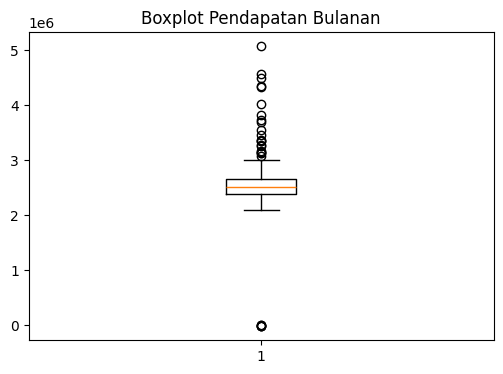

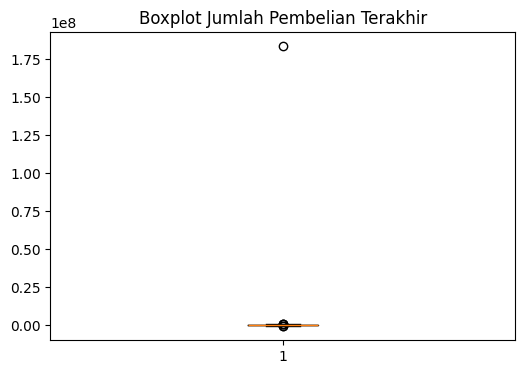

In [ ]:
# Boxplot untuk memvisualisasikan outlier
plt.figure(figsize=(6,4))
plt.boxplot(df_clean['monthly_income_idr'].dropna())
plt.title('Boxplot Pendapatan Bulanan')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df_clean['last_purchase_amount_idr'].dropna())
plt.title('Boxplot Jumlah Pembelian Terakhir')
plt.show()


# **Five applied analyses (with proof)**

In [ ]:
# Analysis 1: Kelompok umur dengan churn tertinggi
top_age_group = age_churn['churn_rate_pct'].idxmax()
print(f"\n1) Kelompok umur dengan churn tertinggi: {top_age_group} dengan churn {age_churn.loc[top_age_group,'churn_rate_pct']:.2f}%")


1) Kelompok umur dengan churn tertinggi: >60 dengan churn 100.00%


In [ ]:
# Analysis 2: Gender dengan churn paling tinggi
top_gender = gender_churn['churn_rate_pct'].idxmax()
print(f"\n2) Gender dengan churn tertinggi: {top_gender} dengan churn {gender_churn.loc[top_gender,'churn_rate_pct']:.2f}%")


2) Gender dengan churn tertinggi: u dengan churn 100.00%


In [ ]:
# Analysis 3: City tier dengan churn paling tinggi
top_city = city_churn['churn_rate_pct'].idxmax()
print(f"\n3) City Tier dengan churn tertinggi: {top_city} dengan churn {city_churn.loc[top_city,'churn_rate_pct']:.2f}%")


3) City Tier dengan churn tertinggi: 1 dengan churn 100.00%


In [ ]:
# Analysis 4: Pengaruh pendapatan terhadap churn (rata-rata)
mean_income_churn0 = df_clean[df_clean['churned']==0]['monthly_income_idr'].mean()
mean_income_churn1 = df_clean[df_clean['churned']==1]['monthly_income_idr'].mean()
print(f"\n4) Rata-rata monthly income churn=0: {mean_income_churn0:.2f}, churn=1: {mean_income_churn1:.2f}")
print("   Jika mean churned lebih rendah, artinya pelanggan berpendapatan rendah lebih cenderung churn (lihat nilai).")


4) Rata-rata monthly income churn=0: 2635752.31, churn=1: 2561050.12
   Jika mean churned lebih rendah, artinya pelanggan berpendapatan rendah lebih cenderung churn (lihat nilai).


In [ ]:
# Analysis 5: Pembuktian statistik hubungan last_purchase_amount dan churn (Mann-Whitney p-value printed earlier)
med_last_purchase = df_clean.groupby('churned')['last_purchase_amount_idr'].median()
print(f"\n5) Median last_purchase_amount per churn group:\n{med_last_purchase}")


5) Median last_purchase_amount per churn group:
churned
0    169801.5
1    158686.5
Name: last_purchase_amount_idr, dtype: float64
